# **Llibreries**
Importem les llibreries que voldrem utilitzar en el projecte.

In [14]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split



# **Dades**
Llegim el csv amb totes les dades disponibles i les mostrem per pantalla

In [3]:
data = pd.read_csv("student-mat.csv")

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Podem veure totes les variables. <br>Podem trobar més informació com quantes columnes i files tenim. (Podemos explicar todas las variables aquí).


In [5]:
data.shape

(395, 33)

Tenim 395 files i 33 columnes. <br>
Més info


In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Ara volem saber si d'aquestes columnes hi alguna amb molt valors NULLS per poder treure-la.

In [7]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No hi ha cap columna amb NULLS per tant ara volem definir quines d'aquestes variables serán útils per al nostre objectiu. (Eliminem les variables que no volem)


In [27]:
data = data.drop(['school', 'famsize', 'Pstatus', 'Fedu', 'Medu', 'Fjob', 'Mjob', 'reason', 'guardian', 'traveltime', 'famsup', 'nursery', 'higher', 'internet', 'goout', 'Dalc', 'Walc', 'health'], axis = 1)

In [29]:
data.shape

(395, 15)

# **Data Transformation**



In [31]:


# for yes / no values:
d = {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(d)

In [32]:
d = {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(d)


In [33]:


data.nunique()




sex            0
age            8
address        2
studytime      4
failures       4
schoolsup      0
paid           2
activities     2
romantic       2
famrel         5
freetime       5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [34]:
data.head()

,sex,age,address,studytime,failures,schoolsup,paid,activities,romantic,famrel,freetime,absences,G1,G2,G3
0,NaN,18,U,2,0,NaN,no,no,no,4,3,6,5,6,6
1,NaN,17,U,2,0,NaN,no,no,no,5,3,4,5,5,6
2,NaN,15,U,2,3,NaN,yes,no,no,4,3,10,7,8,10
3,NaN,15,U,3,0,NaN,yes,yes,yes,3,2,2,15,14,15
4,NaN,16,U,2,0,NaN,yes,no,no,4,3,4,6,10,10


# **Train Test split **

In [35]:

X = df[['G1', 'G2','studytime', 'failures', 'absences']] #Independent variable 
y = df['G3'] #dependent variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NameError: ignored

In [36]:
def bar_plot(variable):
    var = data[variable]
    var_c = var.value_counts()
    
    plt.figure(figsize= (5,5))
    plt.bar(var_c.index, var_c)
    plt.ylabel('Frequency')
    plt.show()
    print("{}\n{}".format(variable, var_c))

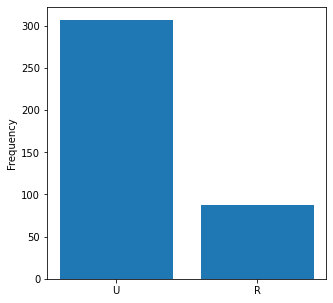

address
U    307
R     88
Name: address, dtype: int64


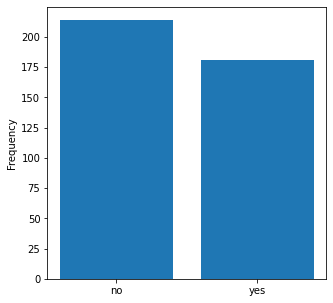

paid
no     214
yes    181
Name: paid, dtype: int64


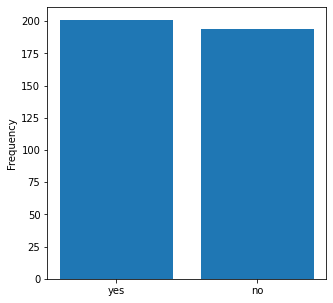

activities
yes    201
no     194
Name: activities, dtype: int64


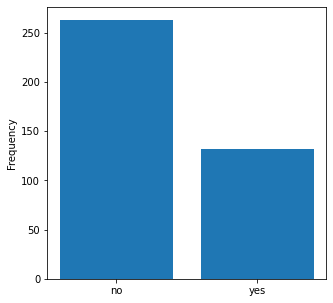

romantic
no     263
yes    132
Name: romantic, dtype: int64


In [37]:


categorical = data.dtypes=='object'
categorical_list = list(categorical[categorical].index)
categorical_list

for i in categorical_list:
    bar_plot(i)

